# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [96]:
# Import relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

### Step 1: Read HTML Data into DataFrame and Clean

In [97]:
# read the table into a DataFrame using pandas
table = pd.read_html("https://static.bc-edx.com/data/web/mars_facts/temperature.html")
mars_df = table[0]

In [98]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 2: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [99]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [100]:
# Change data types for data analysis
mars_df["terrestrial_date"] = mars_df["terrestrial_date"].astype("datetime64") 

In [101]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [102]:
# 1. How many months are there on Mars?
martian_months = len(mars_df["month"].unique())
print("There are %d Martian months." % martian_months)

There are 12 Martian months.


In [103]:
# 2. How many Martian days' worth of data are there?
m_days_of_data = len(mars_df["sol"].unique())
print("There are %d Martian days(sols) of data." % m_days_of_data)

There are 1867 Martian days(sols) of data.


In [104]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month = mars_df.groupby("month")[["min_temp"]].mean()
avg_low_temp_by_month

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


Text(0.5, 1.0, 'Average Martian Temperatures by Month')

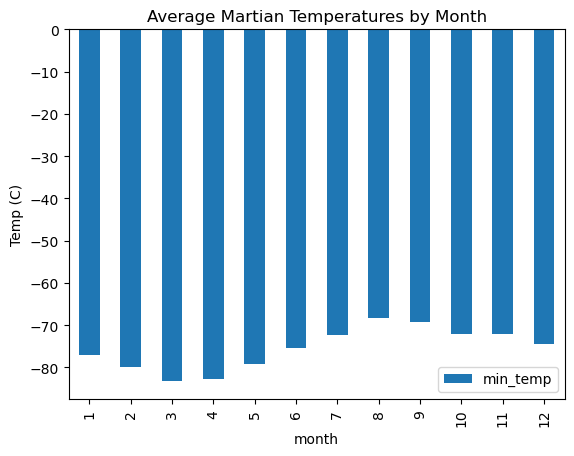

In [105]:
# Plot the average temperature by month
avg_low_temp_by_month.plot(kind="bar")
plt.ylabel("Temp (C)")
plt.title("Average Martian Temperatures by Month")

In [106]:
# Identify the coldest and hottest months in Curiosity's location
sorted_temps = avg_low_temp_by_month.sort_values("min_temp", ascending=True).reset_index()
coldest_month = sorted_temps.iloc[0,0]
hottest_month = sorted_temps.iloc[martian_months-1,0]

print("Mars' coldest month is month %s." % coldest_month)
print("Mars' hottest month is month %s." % hottest_month)

Mars' coldest month is month 3.
Mars' hottest month is month 8.


In [107]:
# 4. Average pressure by Martian month
avg_press_by_month = mars_df.groupby("month")[["pressure"]].mean()

Text(0.5, 1.0, 'Average Martian Pressure by Month')

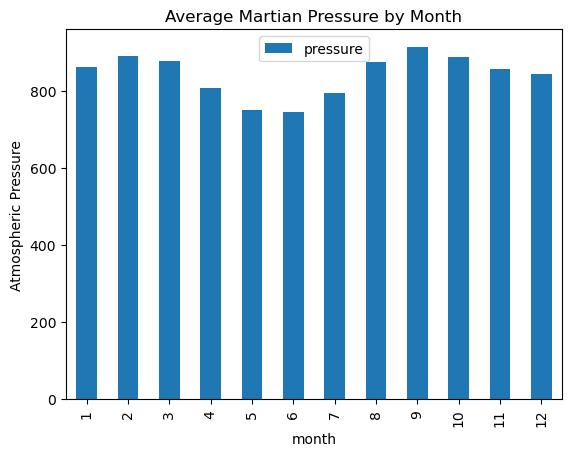

In [108]:
# Plot the average pressure by month
avg_press_by_month.plot(kind="bar")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Martian Pressure by Month")

In [109]:
sorted_press = avg_press_by_month.sort_values("pressure", ascending=True).reset_index()
lowest_press = sorted_press.iloc[0,0]
highest_press = sorted_press.iloc[martian_months-1,0]

print("Mars' lowest average pressure occurs in month %d." % lowest_press)
print("Mars' highest average pressure occurs in month %d." % highest_press)

Mars' lowest average pressure occurs in month 6.
Mars' highest average pressure occurs in month 9.


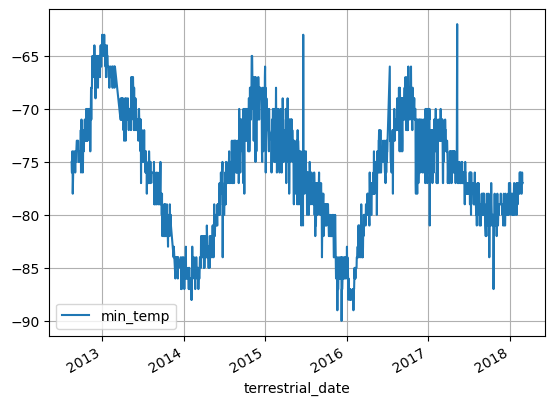

In [110]:
# 5. How many terrestrial (earth) days are there in a Martian year?
temp_plot = mars_df.plot(x="terrestrial_date", y="min_temp", grid=True)

In [111]:
first_peak_date_range = mars_df.loc[(mars_df["terrestrial_date"] < "2014-12-31"), ("terrestrial_date", "min_temp")]
date_first_peak = first_peak_date_range.loc[first_peak_date_range["min_temp"] == first_peak_date_range["min_temp"].max(), ("terrestrial_date")]
date_first_peak.reset_index(drop=True)

second_peak_date_range = mars_df.loc[((mars_df["terrestrial_date"] > "2013-12-31") & (mars_df["terrestrial_date"] < "2015-04-30")), ("terrestrial_date", "min_temp")]
date_second_peak = second_peak_date_range.loc[second_peak_date_range["min_temp"] == second_peak_date_range["min_temp"].max(), ("terrestrial_date")]
date_second_peak.reset_index(drop=True)

mars_short_year_est = date_second_peak.iloc[0] - date_first_peak.iloc[1]
mars_long_year_est = date_second_peak.iloc[1] - date_first_peak.iloc[0]

print(f"Mars takes approximately between {mars_short_year_est} and {mars_long_year_est} to complete one revolution around the sun.")

Mars takes approximately between 661 days 00:00:00 and 672 days 00:00:00 to complete one revolution around the sun.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [112]:
# Write the data to a CSV
mars_df.to_csv("Output/mars_curiousity_data.csv", index=False)